In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics

## Analysis of the Metadata

In [74]:
df1=pd.read_csv('crickets_metadata.csv')

In [75]:
#data eyeballing
df1.head()

,filename,recording_starttime,recording_endtime,Date of Recording,start,end,species,temp,humidity,label,Day_chirp,Time_Chirp,Hour,Label,courtship_count,calling_count,aggression_count
0,GBL_0046.wav,09.02AM,09.32.00AM,12TH Jan 2023,09.16.00AM,09.19.33AM,Male-Female,22.8,58.6,courtship,1,09:16:00,9,0,5.0,NaN,NaN
1,GBL_0046.wav,09.02AM,09.32.00AM,12TH Jan 2023,09.23.36AM,09.23.37AM,Male-Female,22.8,58.4,courtship,1,09:23:36,9,0,NaN,NaN,NaN
2,GBL_0046.wav,09.02AM,09.32.00AM,12TH Jan 2023,09.23.47AM,09.23.49AM,Male-Female,22.8,58.3,courtship,1,09:23:47,9,0,NaN,NaN,NaN
3,GBL_0046.wav,09.02AM,09.32.00AM,12TH Jan 2023,09.23.58AM,09.32.00AM,Male-Female,22.8,58.2,courtship,1,09:23:58,9,0,NaN,NaN,NaN
4,GBL_0047.wav,09.42AM,10.12.00AM,12TH Jan 2023,09.43.34AM,09.51.53AM,Male-Female,22.8,57.6,courtship,1,09:43:34,9,0,NaN,NaN,NaN


In [76]:
# inspecting feature datatypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   filename             592 non-null    object 
 1   recording_starttime  592 non-null    object 
 2   recording_endtime    592 non-null    object 
 3   Date of Recording    592 non-null    object 
 4   start                592 non-null    object 
 5   end                  592 non-null    object 
 6   species              592 non-null    object 
 7   temp                 592 non-null    float64
 8   humidity             592 non-null    float64
 9   label                592 non-null    object 
 10  Day_chirp            592 non-null    int64  
 11  Time_Chirp           592 non-null    object 
 12  Hour                 592 non-null    int64  
 13  Label                592 non-null    int64  
 14  courtship_count      57 non-null     float64
 15  calling_count        114 non-null    flo

- recording_starttime,recording_endtime,start and end are of datatype of object but should be of datatime data type

In [77]:
#replacing strings AM and PM 
df1['recording_starttime'] = df1['recording_starttime'].str.replace('AM','').str.replace('PM','')
df1['recording_endtime'] = df1['recording_endtime'].str.replace('AM','').str.replace('PM','')
df1['start'] = df1['start'].str.replace('AM','').str.replace('PM','')
df1['end'] = df1['end'].str.replace('AM','').str.replace('PM','')

In [78]:
# converting record_starttime, record_endtime, start and end to datetime
df1['recording_starttime']=pd.to_datetime(df1['recording_starttime'],format='%H.%M')
df1['recording_endtime']=pd.to_datetime(df1['recording_endtime'],format='%H.%M.%S')
df1['end'] =pd.to_datetime(df1['end'],format='%H.%M.%S')
df1['start'] =pd.to_datetime(df1['start'],format='%H.%M.%S')

In [79]:
df1['Date of Recording']=pd.to_datetime(df1['Date of Recording'])

In [80]:
#confirming the changes in datatype conversion
df1.dtypes

filename                       object
recording_starttime    datetime64[ns]
recording_endtime      datetime64[ns]
Date of Recording      datetime64[ns]
start                  datetime64[ns]
end                    datetime64[ns]
species                        object
temp                          float64
humidity                      float64
label                          object
Day_chirp                       int64
Time_Chirp                     object
Hour                            int64
Label                           int64
courtship_count               float64
calling_count                 float64
aggression_count              float64
dtype: object

In [81]:
df1.head()

,filename,recording_starttime,recording_endtime,Date of Recording,start,end,species,temp,humidity,label,Day_chirp,Time_Chirp,Hour,Label,courtship_count,calling_count,aggression_count
0,GBL_0046.wav,1900-01-01 09:02:00,1900-01-01 09:32:00,2023-01-12,1900-01-01 09:16:00,1900-01-01 09:19:33,Male-Female,22.8,58.6,courtship,1,09:16:00,9,0,5.0,NaN,NaN
1,GBL_0046.wav,1900-01-01 09:02:00,1900-01-01 09:32:00,2023-01-12,1900-01-01 09:23:36,1900-01-01 09:23:37,Male-Female,22.8,58.4,courtship,1,09:23:36,9,0,NaN,NaN,NaN
2,GBL_0046.wav,1900-01-01 09:02:00,1900-01-01 09:32:00,2023-01-12,1900-01-01 09:23:47,1900-01-01 09:23:49,Male-Female,22.8,58.3,courtship,1,09:23:47,9,0,NaN,NaN,NaN
3,GBL_0046.wav,1900-01-01 09:02:00,1900-01-01 09:32:00,2023-01-12,1900-01-01 09:23:58,1900-01-01 09:32:00,Male-Female,22.8,58.2,courtship,1,09:23:58,9,0,NaN,NaN,NaN
4,GBL_0047.wav,1900-01-01 09:42:00,1900-01-01 10:12:00,2023-01-12,1900-01-01 09:43:34,1900-01-01 09:51:53,Male-Female,22.8,57.6,courtship,1,09:43:34,9,0,NaN,NaN,NaN


In [82]:
#checking for unique labels in the label column
df1['label'].unique()

array(['courtship', 'calling ', 'calling', 'courtship ', 'courstship',
       'aggression', 'rivarly', 'aggression '], dtype=object)

In [83]:
#amonizing the labels in the label column
df1['label']=df1['label'].str.replace('calling ','calling')
df1['label']=df1['label'].str.replace('aggression ','aggression').str.replace('rivarly','aggression')
df1['label']=df1['label'].str.replace('courtship ','courtship').str.replace('courstship','courtship')

In [84]:
#confirming the changes
df1['label'].unique()

array(['courtship', 'calling', 'aggression'], dtype=object)

In [85]:
#save to excel
#df1.to_excel("output.xlsx") 

In [86]:
#summary statistics of the dataset
df1.describe()

,temp,humidity,Day_chirp,Hour,Label,courtship_count,calling_count,aggression_count
count,592.000000,592.000000,592.000000,592.000000,592.000000,57.000000,114.000000,25.000000
mean,23.663514,45.661318,6.173986,11.320946,0.883446,1.877193,3.859649,1.560000
std,0.605798,6.402390,3.794439,7.011354,0.488372,1.363690,3.486706,1.193035
min,20.600000,25.200000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,23.175000,41.475000,3.000000,6.000000,1.000000,1.000000,2.000000,1.000000
50%,23.700000,46.250000,6.000000,10.000000,1.000000,2.000000,3.000000,1.000000
75%,24.100000,50.125000,10.000000,18.000000,1.000000,2.000000,5.000000,2.000000
max,25.300000,65.800000,13.000000,23.000000,2.000000,9.000000,21.000000,6.000000


- The lowest temperature recorded was 20.6 while the highest temperature recorded was 25.3
- The lowest humidity recorded was 25.2 while the maximum humidity recorded was 65.8

In [87]:
df1.columns

Index(['filename', 'recording_starttime', 'recording_endtime',
       'Date of Recording', 'start', 'end', 'species', 'temp', 'humidity',
       'label', 'Day_chirp', 'Time_Chirp', 'Hour', 'Label', 'courtship_count',
       'calling_count', 'aggression_count'],
      dtype='object')

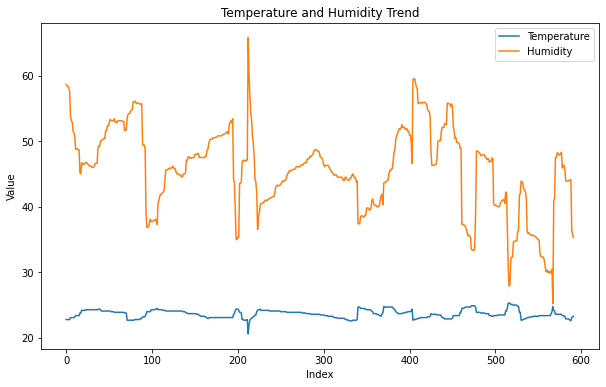

In [88]:
fig, ax = plt.subplots(figsize=(10, 6))
df1['temp'].plot(ax=ax, label='Temperature')
df1['humidity'].plot(ax=ax, label='Humidity')

# set chart title and axis labels
#ax.set_title('Temperature and Humidity Trend')
#ax.set_xlabel('Index')
#ax.set_ylabel('Value')
plt.title('Temperature and Humidity Trend')
plt.xlabel('Index')
plt.ylabel('Value')
# display the legend
ax.legend()

# display the chart
plt.show()

- From the graphs above, temp does not affect the kind of song produced by the cricket because it constant
- The effects of the trend on humidity against the songs can not be substantiated

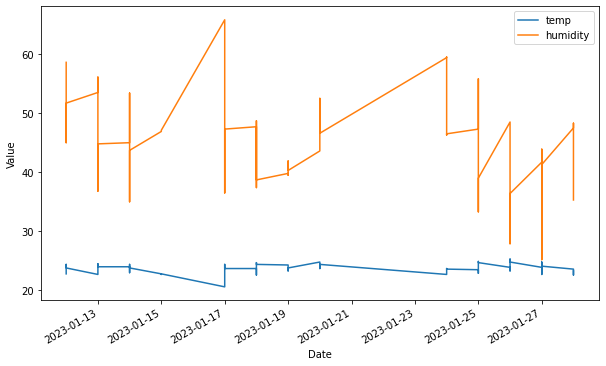

In [89]:
#trend of temperature based on the date of recording
# create a line chart with temperature and humidity
fig, ax = plt.subplots(figsize=(10, 6))
df1.plot(x='Date of Recording', y=['temp', 'humidity'], ax=ax)

# set chart title and axis labels
#ax.set_title('Temperature and Humidity Trend')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# display the chart
plt.show()

In [90]:
#distribution of labels based on the species
df_1=df1.groupby(['species'])['species'].count()
df_1.head()

species
Male            64
Male-Female    302
Male-Male      226
Name: species, dtype: int64

<Axes: xlabel='species', ylabel='species'>

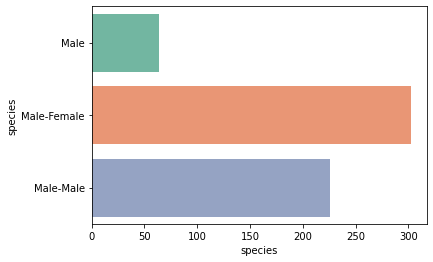

In [91]:
sns.barplot(y=df_1.index,x=df_1,palette='Set2',orient='h')

- Male-Female have the highest contribution to the labels in thi dataset followed by Male-Male and finally Male

In [92]:
#distribution of labels in the dataset
df_2=df1.groupby(['label'])['label'].count()
df_2

label
aggression     40
calling       443
courtship     109
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='label'>

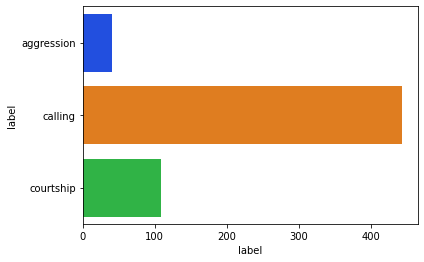

In [93]:
sns.barplot(y=df_2.index,x=df_2,palette='bright',orient='h')

<Axes: xlabel='temp', ylabel='label'>

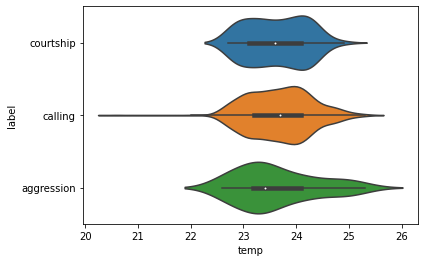

In [94]:
# effects of temp on the label
sns.violinplot(x=df1['temp'],y=df1['label'])

<Axes: xlabel='humidity', ylabel='label'>

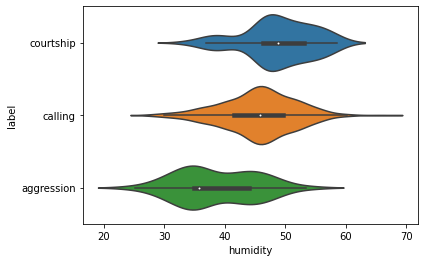

In [95]:
#effects of humidity on the label
sns.violinplot(x=df1['humidity'],y=df1['label'])

<Axes: xlabel='temp', ylabel='humidity'>

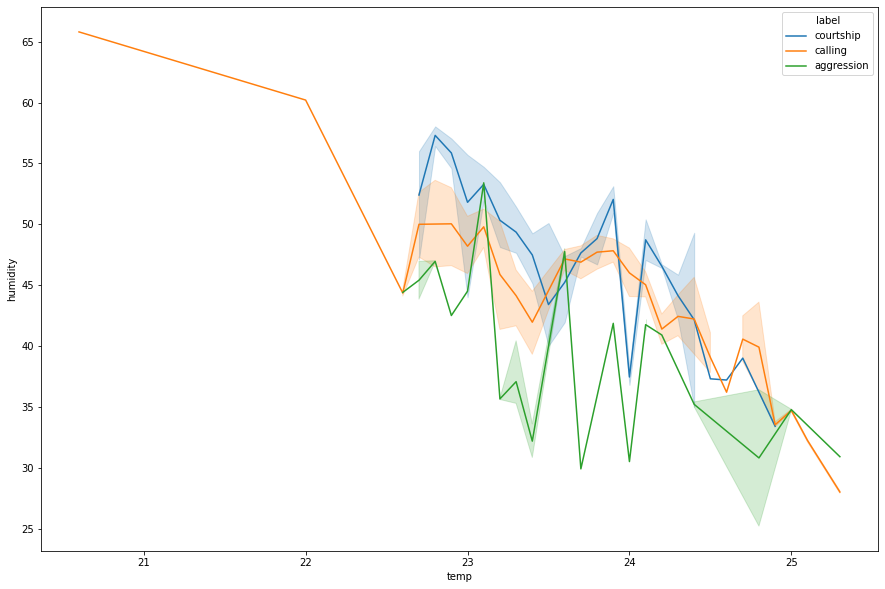

In [96]:
#effects of temparature and humidity over the songs
plt.figure(figsize=(15,10))
sns.lineplot(x=df1['temp'],y=df1['humidity'],hue=df1['label'])

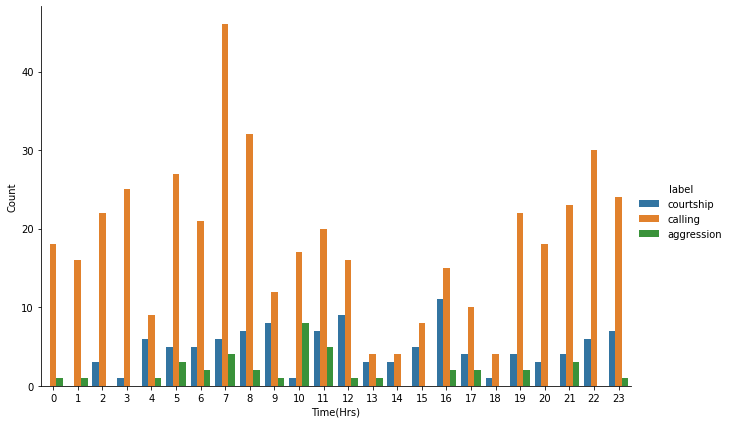

In [107]:
sns.catplot(x='Hour', hue='label', kind='count', data=df1, height=6, aspect=1.5)
#plt.title('Label Distribution across Time')
plt.xlabel('Time(Hrs)')
plt.ylabel('Count')
plt.show()


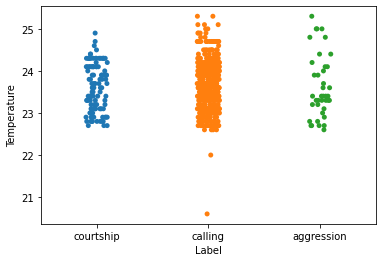

In [98]:
sns.stripplot(x='label', y='temp', data=df1, jitter=True)
#plt.title('Temperature vs. Label')
plt.xlabel('Label')
plt.ylabel('Temperature')
plt.show()

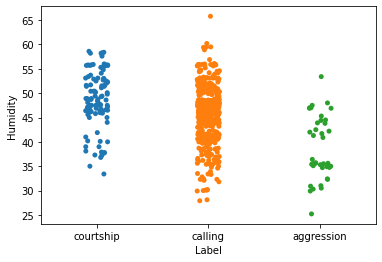

In [99]:
sns.stripplot(x='label', y='humidity', data=df1, jitter=True)
#plt.title('Humidity vs. Label')
plt.xlabel('Label')
plt.ylabel('Humidity')
plt.show()

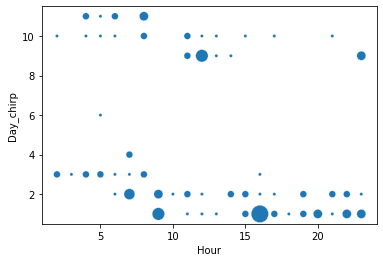

In [100]:
#A scatter plot to establish the courtship song chirp rate in 24 hrs
sns.scatterplot(data=df1,x="Hour", y='Day_chirp', size='courtship_count', legend=False, sizes=(10, 300))

# show the graph
plt.show()

In [102]:
# Using GroupBy multiple column
#df2 = df1[['Day_chirp','Hour','label']]
#df2

In [103]:
#df2['count']=df2.groupby('Day_chirp')['label'].count()
#df2.head()

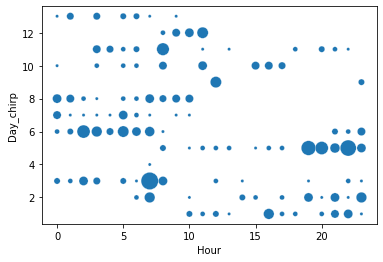

In [105]:
#a scatter plot to establish the time of cricket chirping for calling song
sns.scatterplot(data=df1, x="Hour", y="Day_chirp", size='calling_count', legend=False, sizes=(10, 300))

# show the graph
plt.show()

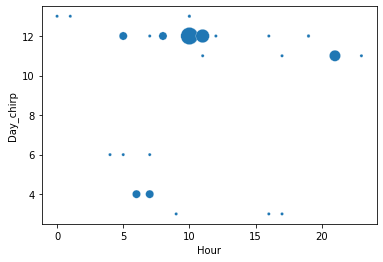

In [106]:
#a scatter plot to establish the time of cricket chirping for aggression song
sns.scatterplot(data=df1, x="Hour", y="Day_chirp", size='aggression_count', legend=False, sizes=(10, 300))

# show the graph
plt.show()

## Chroma Feature Modeling

In [108]:
#importing the dataset
df=pd.read_csv('chroma_features.csv')

## Inspecting the dataset

In [109]:
df.head()

,Unnamed: 0,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,Temperature,Humidity,Label,Filename
0,0,0.719711,0.731053,0.793824,0.838842,0.784447,0.706598,0.786601,0.717454,0.700665,0.690752,0.697411,0.682494,22.8,58.6,courtship,GBL_0046_01_001.wav
1,1,0.795826,0.808380,0.767941,0.820253,0.792821,0.704216,0.773024,0.804616,0.771626,0.752125,0.788543,0.775452,22.8,58.6,courtship,GBL_0046_01_002.wav
2,2,0.778523,0.784773,0.808700,0.805103,0.749121,0.717717,0.752525,0.681978,0.725333,0.733151,0.725552,0.768984,22.8,58.6,courtship,GBL_0046_01_003.wav
3,3,0.801949,0.787761,0.784814,0.799364,0.705189,0.733365,0.751102,0.724839,0.767311,0.737196,0.738395,0.783974,22.8,58.6,courtship,GBL_0046_01_004.wav
4,4,0.796681,0.796880,0.801317,0.824423,0.830665,0.730091,0.716639,0.709058,0.724263,0.740670,0.743415,0.764478,22.8,58.6,courtship,GBL_0046_01_005.wav


In [110]:
df.tail()

,Unnamed: 0,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,Temperature,Humidity,Label,Filename
83804,83804,0.475494,0.483717,0.546316,0.958237,0.643762,0.407991,0.413002,0.410490,0.447287,0.454140,0.437504,0.431886,23.2,35.7,aggression,GBL_0536_591_020.wav
83805,83805,0.829125,0.824052,0.850473,0.894379,0.807563,0.694619,0.731815,0.792025,0.801647,0.783113,0.816922,0.811709,23.2,35.7,aggression,GBL_0536_591_021.wav
83806,83806,0.406351,0.394682,0.500707,0.943411,0.555865,0.330818,0.339971,0.342616,0.352318,0.386479,0.353505,0.382311,23.2,35.7,aggression,GBL_0536_591_022.wav
83807,83807,0.531006,0.569288,0.562185,0.835592,0.872642,0.507976,0.464406,0.472830,0.485418,0.508892,0.517305,0.500466,23.2,35.7,aggression,GBL_0536_591_023.wav
83808,83808,0.523754,0.555927,0.720315,0.939100,0.530435,0.462332,0.482756,0.496258,0.534412,0.567131,0.507181,0.500724,23.3,35.3,aggression,GBL_0536_592_001.wav


In [111]:
df.shape

(83809, 17)

In [112]:
df.columns

Index(['Unnamed: 0', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A',
       'A#', 'B', 'Temperature', 'Humidity', 'Label', 'Filename'],
      dtype='object')

In [113]:
df.dtypes

Unnamed: 0       int64
C              float64
C#             float64
D              float64
D#             float64
E              float64
F              float64
F#             float64
G              float64
G#             float64
A              float64
A#             float64
B              float64
Temperature    float64
Humidity       float64
Label           object
Filename        object
dtype: object

In [114]:
#checking for unique values of label column
df.Label.unique()

array(['courtship', 'calling', 'aggression'], dtype=object)

In [115]:
#drop Unnamed column and Filename
df=df.drop(columns=['Unnamed: 0','Filename'],axis=1)

In [116]:
df.head()

,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,Temperature,Humidity,Label
0,0.719711,0.731053,0.793824,0.838842,0.784447,0.706598,0.786601,0.717454,0.700665,0.690752,0.697411,0.682494,22.8,58.6,courtship
1,0.795826,0.808380,0.767941,0.820253,0.792821,0.704216,0.773024,0.804616,0.771626,0.752125,0.788543,0.775452,22.8,58.6,courtship
2,0.778523,0.784773,0.808700,0.805103,0.749121,0.717717,0.752525,0.681978,0.725333,0.733151,0.725552,0.768984,22.8,58.6,courtship
3,0.801949,0.787761,0.784814,0.799364,0.705189,0.733365,0.751102,0.724839,0.767311,0.737196,0.738395,0.783974,22.8,58.6,courtship
4,0.796681,0.796880,0.801317,0.824423,0.830665,0.730091,0.716639,0.709058,0.724263,0.740670,0.743415,0.764478,22.8,58.6,courtship


In [117]:
df.shape

(83809, 15)

In [118]:
df.describe()

,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,Temperature,Humidity
count,83809.000000,83809.000000,83809.000000,83809.000000,83809.000000,83809.000000,83809.000000,83809.000000,83809.000000,83809.000000,83809.000000,83809.000000,83809.000000,83809.000000
mean,0.165875,0.211772,0.399390,0.715706,0.597654,0.185244,0.147816,0.142141,0.142523,0.144524,0.147734,0.152789,23.591619,45.963159
std,0.267113,0.305735,0.359670,0.272573,0.376304,0.237347,0.243335,0.233377,0.234579,0.237981,0.243247,0.251324,0.558806,5.299512
min,0.000186,0.000456,0.007001,0.037283,0.006082,0.001260,0.000324,0.000226,0.000163,0.000126,0.000125,0.000133,20.600000,25.200000
25%,0.001347,0.002188,0.033463,0.440934,0.181458,0.026985,0.001812,0.001323,0.001260,0.001242,0.001247,0.001278,23.100000,41.500000
50%,0.018405,0.032657,0.323246,0.803732,0.701553,0.083849,0.014862,0.014909,0.014897,0.015058,0.015354,0.015812,23.700000,45.800000
75%,0.192732,0.359090,0.760779,0.999501,1.000000,0.174329,0.158206,0.157945,0.158509,0.160811,0.164345,0.169553,24.000000,50.300000
max,0.946738,1.000000,1.000000,1.000000,1.000000,0.902574,0.892695,0.864119,0.863437,0.879938,0.877505,0.942888,25.300000,65.800000


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Label', ylabel='count'>

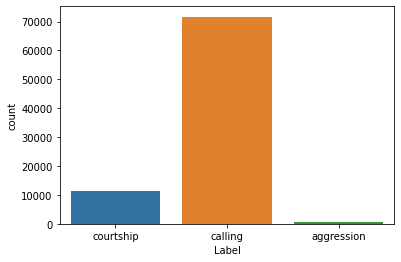

In [119]:
#checking for data imbalance
sns.countplot(df['Label'])

In [120]:
df['Label'].value_counts()

calling       71690
courtship     11492
aggression      627
Name: Label, dtype: int64

- Data is highly imbalanced, with majority class falling within the calling label

In [121]:
#scaling temperature and humidity using min-max scaler
min_max_scaler=preprocessing.MinMaxScaler()
df[['Temperature','Humidity']] = min_max_scaler.fit_transform(df[['Temperature', 'Humidity']])

In [122]:
df.head()

,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,Temperature,Humidity,Label
0,0.719711,0.731053,0.793824,0.838842,0.784447,0.706598,0.786601,0.717454,0.700665,0.690752,0.697411,0.682494,0.468085,0.82266,courtship
1,0.795826,0.808380,0.767941,0.820253,0.792821,0.704216,0.773024,0.804616,0.771626,0.752125,0.788543,0.775452,0.468085,0.82266,courtship
2,0.778523,0.784773,0.808700,0.805103,0.749121,0.717717,0.752525,0.681978,0.725333,0.733151,0.725552,0.768984,0.468085,0.82266,courtship
3,0.801949,0.787761,0.784814,0.799364,0.705189,0.733365,0.751102,0.724839,0.767311,0.737196,0.738395,0.783974,0.468085,0.82266,courtship
4,0.796681,0.796880,0.801317,0.824423,0.830665,0.730091,0.716639,0.709058,0.724263,0.740670,0.743415,0.764478,0.468085,0.82266,courtship


In [123]:
# encoding the target column
label_encoder=preprocessing.LabelEncoder()
df['Label_Encoded']=label_encoder.fit_transform(df['Label'])
df['Label_Encoded'].unique()

array([2, 1, 0])

In [124]:
df.head()

,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,Temperature,Humidity,Label,Label_Encoded
0,0.719711,0.731053,0.793824,0.838842,0.784447,0.706598,0.786601,0.717454,0.700665,0.690752,0.697411,0.682494,0.468085,0.82266,courtship,2
1,0.795826,0.808380,0.767941,0.820253,0.792821,0.704216,0.773024,0.804616,0.771626,0.752125,0.788543,0.775452,0.468085,0.82266,courtship,2
2,0.778523,0.784773,0.808700,0.805103,0.749121,0.717717,0.752525,0.681978,0.725333,0.733151,0.725552,0.768984,0.468085,0.82266,courtship,2
3,0.801949,0.787761,0.784814,0.799364,0.705189,0.733365,0.751102,0.724839,0.767311,0.737196,0.738395,0.783974,0.468085,0.82266,courtship,2
4,0.796681,0.796880,0.801317,0.824423,0.830665,0.730091,0.716639,0.709058,0.724263,0.740670,0.743415,0.764478,0.468085,0.82266,courtship,2


In [125]:
#split the data into predictor and target values
X=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
y=df.iloc[:,[15]]

In [126]:
X.head()

,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,Temperature,Humidity
0,0.719711,0.731053,0.793824,0.838842,0.784447,0.706598,0.786601,0.717454,0.700665,0.690752,0.697411,0.682494,0.468085,0.82266
1,0.795826,0.808380,0.767941,0.820253,0.792821,0.704216,0.773024,0.804616,0.771626,0.752125,0.788543,0.775452,0.468085,0.82266
2,0.778523,0.784773,0.808700,0.805103,0.749121,0.717717,0.752525,0.681978,0.725333,0.733151,0.725552,0.768984,0.468085,0.82266
3,0.801949,0.787761,0.784814,0.799364,0.705189,0.733365,0.751102,0.724839,0.767311,0.737196,0.738395,0.783974,0.468085,0.82266
4,0.796681,0.796880,0.801317,0.824423,0.830665,0.730091,0.716639,0.709058,0.724263,0.740670,0.743415,0.764478,0.468085,0.82266


In [127]:
X.shape

(83809, 14)

In [128]:
y.shape

(83809, 1)

## Splitting data 

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)

In [130]:
X_train.head()

,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,Temperature,Humidity
62475,0.000576,0.001044,0.019650,0.417446,1.000000,0.091140,0.000922,0.000529,0.000510,0.000510,0.000528,0.000548,0.659574,0.647783
61863,0.000439,0.000891,0.017567,0.411716,1.000000,0.084472,0.000869,0.000487,0.000425,0.000399,0.000372,0.000397,0.659574,0.647783
58717,0.000579,0.001085,0.021405,0.440861,1.000000,0.077375,0.001106,0.000628,0.000570,0.000564,0.000570,0.000541,0.702128,0.633005
1798,0.807502,0.847322,0.841869,0.848620,0.868967,0.801158,0.744674,0.740087,0.782896,0.797793,0.741766,0.749015,0.531915,0.647783
74526,0.039357,0.043040,0.079800,0.726754,0.999157,0.096496,0.039501,0.036520,0.036985,0.038268,0.039246,0.036344,0.510638,0.399015


In [131]:
min_max_scaler=preprocessing.MinMaxScaler()
X_train[['Temperature','Humidity']] = min_max_scaler.fit_transform(X_train[['Temperature', 'Humidity']])

In [132]:
X_train

,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,Temperature,Humidity
62475,0.000576,0.001044,0.019650,0.417446,1.000000,0.091140,0.000922,0.000529,0.000510,0.000510,0.000528,0.000548,0.659574,0.647783
61863,0.000439,0.000891,0.017567,0.411716,1.000000,0.084472,0.000869,0.000487,0.000425,0.000399,0.000372,0.000397,0.659574,0.647783
58717,0.000579,0.001085,0.021405,0.440861,1.000000,0.077375,0.001106,0.000628,0.000570,0.000564,0.000570,0.000541,0.702128,0.633005
1798,0.807502,0.847322,0.841869,0.848620,0.868967,0.801158,0.744674,0.740087,0.782896,0.797793,0.741766,0.749015,0.531915,0.647783
74526,0.039357,0.043040,0.079800,0.726754,0.999157,0.096496,0.039501,0.036520,0.036985,0.038268,0.039246,0.036344,0.510638,0.399015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77140,0.018549,0.020260,0.103967,0.996427,0.759802,0.033649,0.017765,0.017187,0.017439,0.017992,0.017581,0.016994,0.595745,0.509852
19163,0.732809,0.713605,0.826854,0.882664,0.892480,0.694557,0.686511,0.759221,0.667371,0.656995,0.679300,0.699450,0.808511,0.241379
7426,0.018265,0.210203,1.000000,0.403217,0.015943,0.003268,0.002441,0.002543,0.002428,0.002250,0.002288,0.002566,0.446809,0.697044
75756,0.159361,0.166312,0.583958,0.997382,0.219363,0.119206,0.133986,0.129082,0.131407,0.158823,0.159456,0.157731,0.531915,0.266010


In [133]:
X_test[['Temperature','Humidity']] = min_max_scaler.fit_transform(X_test[['Temperature', 'Humidity']])

## Using SMOTE to balance the data

In [134]:
from imblearn.over_sampling import SMOTE

(150549, 14)


<Axes: title={'center': 'Count of Classes'}, xlabel='Label_Encoded'>

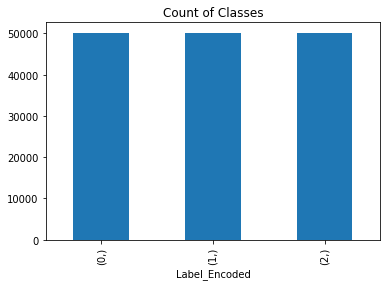

In [135]:
smote = SMOTE(random_state=42, k_neighbors=100)
X_ssample, y_ssample=smote.fit_resample(X_train, y_train)

print(X_ssample.shape)

y_ssample.value_counts().plot(kind='bar', title='Count of Classes')

## Training the model using Support Vector Machine

In [136]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [137]:
svmodel = SVC()
svmodel.fit(X_ssample, np.ravel(y_ssample))

SVC()

In [138]:
svmodel_pred=svmodel.predict(X_test)

In [139]:
svmodel_accuracy=accuracy_score(y_test,svmodel_pred)
print('Accuracy score is:',svmodel_accuracy)

Accuracy score is: 0.7692399475002983


In [140]:
#checking performance using F1-score
svmodel_f1 = f1_score(y_test,svmodel_pred,average='weighted')
print('F1 score is:',svmodel_f1)

F1 score is: 0.8232955218792597


## Training the model with K-Nearest Neighbor (KNN)

In [141]:
from sklearn.neighbors import KNeighborsClassifier

In [142]:
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_ssample, np.ravel(y_ssample))

KNeighborsClassifier()

In [143]:
#model prediction
knn_pred=knn_classifier.predict(X_test)

In [144]:
#evaluating the perfomance of the model
knn_accuracy=accuracy_score(y_test,knn_pred)
print('KNN accuracy score is:',knn_accuracy)
knn_f1=f1_score(y_test,knn_pred,average='weighted')
print('KNN f1-score is:',knn_f1)

KNN accuracy score is: 0.8738813984011454
KNN f1-score is: 0.8928044056746658


## Training the model with Random Forest (RF) classifier

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
Rf_model=RandomForestClassifier(random_state=42)
Rf_model.fit(X_ssample, np.ravel(y_ssample))

RandomForestClassifier(random_state=42)

In [ ]:
#model prediction
Rf_pred=Rf_model.predict(X_test)

In [ ]:
#Evaluating the performance of the model
Rf_accuracy=accuracy_score(y_test,Rf_pred)
print("RF accuracy score is:",Rf_accuracy)
Rf_f1=f1_score(y_test,Rf_pred,average='weighted')
print('RF f1-score is:',Rf_f1)

## MFCC FEATURE MODEL TRAINING

In [ ]:
data=pd.read_csv('mfcc_features.csv')

In [ ]:
data.head()

In [ ]:
data.shape

# droping unnamed column and filename

In [ ]:
data=data.drop(columns=['Unnamed: 0','Filename'],axis=1)

In [ ]:
#data types
#data.dtypes

In [ ]:
data['Label'].unique()

In [ ]:
data.describe()

In [ ]:
#scaling features
#min_max_scaler=preprocessing.MinMaxScaler()
#data[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','Temperature','Humidity']] = min_max_scaler.fit_transform(data[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','Temperature', 'Humidity']])

In [ ]:
# encoding the target column
label_encoder=preprocessing.LabelEncoder()
data['Label_Encoded']=label_encoder.fit_transform(data['Label'])
data['Label_Encoded'].unique()

In [ ]:
#inspecting dataframe to confirm changes
data.head()

In [ ]:
data.describe()

In [ ]:
data.shape

In [ ]:
# splitting the data into predictor and target variables
pred_val=data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]
target_val=data.iloc[:,[16]]

In [ ]:
pred_val.head()

In [ ]:
target_val.head()

In [ ]:
#splitting the data into training and test data
x_train,x_test,Y_train,Y_test=train_test_split(pred_val,target_val,test_size=0.30,random_state=42,stratify=target_val)

In [ ]:
#scaling the data using min-max scaler
min_max_scaler=preprocessing.MinMaxScaler()
x_train= min_max_scaler.fit_transform(x_train)

In [ ]:
x_test= min_max_scaler.fit_transform(x_test)

In [ ]:
x_test.shape

In [ ]:
Y_test.shape

## Handling class imbalance using SMOTE

In [ ]:
smote = SMOTE(random_state=42, k_neighbors=100)
x_ssample, Y_ssample=smote.fit_resample(x_train, Y_train)

print(x_ssample.shape)

Y_ssample.value_counts().plot(kind='bar', title='Count of Classes')

## MFCC feature with SVM

In [ ]:
svm_mfcc = SVC()
svm_mfcc.fit(x_ssample, np.ravel(Y_ssample))

In [ ]:
svm_mfcc_pred=svm_mfcc.predict(x_test)

In [ ]:
#Evaluating model perfomance
mfcc_accuracy=accuracy_score(Y_test,svm_mfcc_pred)
print("SVM with MFCC feature accuracy is:",mfcc_accuracy.round(4))
mfcc_f1=f1_score(Y_test,svm_mfcc_pred,average='weighted')
print("SVM with MFCC feature f1-score is:",mfcc_f1.round(4))

## MFCC feature with KNN

In [ ]:
knn_mfcc=KNeighborsClassifier()
knn_mfcc.fit(x_ssample, np.ravel(Y_ssample))

In [ ]:
#model prediction
knn_mfcc_pred=knn_mfcc.predict(x_test)

In [ ]:
#Evaluating model performance
knn_mfcc_accuracy=accuracy_score(Y_test,knn_mfcc_pred)
print("KNN with MFCC feature accuracy is:",knn_mfcc_accuracy.round(4))
knn_mfcc_f1=f1_score(Y_test,knn_mfcc_pred,average='weighted')
print("KNN with MFCC feature f1-score is:",knn_mfcc_f1.round(4))

## MFCC feature with RF classifier

In [ ]:
Rf_mfcc_model=RandomForestClassifier(random_state=42)
Rf_mfcc_model.fit(x_ssample, np.ravel(Y_ssample))

In [ ]:
#Model prediction
Rf_mfcc_pred=Rf_mfcc_model.predict(x_test)

In [ ]:
#Evaluating the model performance
rf_mfcc_accuracy=accuracy_score(Y_test,Rf_mfcc_pred)
print("RF with MFCC feature accuracy is:",rf_mfcc_accuracy.round(4))
rf_mfcc_f1=f1_score(Y_test,Rf_mfcc_pred,average='weighted')
print("RF with MFCC feature f1-score is:",rf_mfcc_f1.round(4))

## LFCC Feature Model Training

In [ ]:
df3=pd.read_csv('lfcc_features.csv')

In [ ]:
df3.head()

In [ ]:
#drop columns
df3=df3.drop(columns=['Unnamed: 0','Filename'],axis=1)

In [ ]:
df3.head()

In [ ]:
# encoding the label column
label_encoder=preprocessing.LabelEncoder()
df3['Label_Encoded']=label_encoder.fit_transform(data['Label'])
df3['Label_Encoded'].unique()

In [ ]:
#summary statistics of the dataset
df3.describe()

In [ ]:
#predictor and target variables
predictor=df3.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]
target=df3.iloc[:,[16]]

In [ ]:
predictor.head()

In [ ]:
target.head()

In [ ]:
#split data into training and testing data
XX_train,XX_test,yy_train,yy_test=train_test_split(predictor,target,test_size=0.30,random_state=42,stratify=target)

In [ ]:
print('The size of training data is:',XX_train.shape)
print('The size of testing data is:',yy_test.shape)

In [ ]:
# scaling the XX_train and XX_test data using min_max scaler
min_max_scaler=preprocessing.MinMaxScaler()
XX_train= min_max_scaler.fit_transform(XX_train)

In [ ]:
XX_test=min_max_scaler.fit_transform(XX_test)

In [ ]:
#Balancing the data using Synthetic Minority sampling Technique
smote = SMOTE(random_state=42, k_neighbors=100)
XX_ssample, yy_ssample=smote.fit_resample(XX_train, yy_train)

print(XX_ssample.shape)

yy_ssample.value_counts().plot(kind='bar', title='Count of Classes')

## Fitting SVM model 

In [ ]:
svm_lfcc = SVC()
svm_lfcc.fit(XX_ssample, np.ravel(yy_ssample))

In [ ]:
svm_lfcc_pred=svm_mfcc.predict(XX_test)

In [ ]:
#Evaluating model perfomance
lfcc_accuracy=accuracy_score(yy_test,svm_lfcc_pred)
print("SVM with LFCC feature accuracy is:",lfcc_accuracy.round(4))
lfcc_f1=f1_score(yy_test,svm_lfcc_pred,average='weighted')
print("SVM with LFCC feature f1-score is:",lfcc_f1.round(4))

## Fitting KNN model

In [ ]:
knn_lfcc=KNeighborsClassifier()
knn_lfcc.fit(XX_ssample, np.ravel(yy_ssample))

In [ ]:
knn_lfcc_pred=knn_lfcc.predict(XX_test)

In [ ]:
#Evaluating model performance
knn_lfcc_accuracy=accuracy_score(yy_test,knn_lfcc_pred)
print("KNN with LFCC feature accuracy is:",knn_lfcc_accuracy.round(4))
knn_lfcc_f1=f1_score(yy_test,knn_lfcc_pred,average='weighted')
print("KNN with LFCC feature f1-score is:",knn_lfcc_f1.round(4))

## Fitting RF model

In [ ]:
Rf_lfcc_model=RandomForestClassifier(random_state=42)
Rf_lfcc_model.fit(XX_ssample, np.ravel(yy_ssample))

In [ ]:
#Model prediction
Rf_lfcc_pred=Rf_lfcc_model.predict(XX_test)

In [ ]:
#Evaluating the model performance
rf_lfcc_accuracy=accuracy_score(yy_test,Rf_lfcc_pred)
print("RF with LFCC feature accuracy is:",rf_lfcc_accuracy.round(4))
rf_lfcc_f1=f1_score(yy_test,Rf_lfcc_pred,average='weighted')
print("RF with LFCC feature f1-score is:",rf_lfcc_f1.round(4))
# Print the confusion matrix
print(metrics.confusion_matrix(yy_test,Rf_lfcc_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(yy_test,Rf_lfcc_pred,digits=3))

## Shallow Machine Learning Model comparison

## single feature performance comparison

In [ ]:
single_feat={
    'Feature':['Chroma','MFCC','LFCC'],
    'SVM':[0.8233,0.7990,0.7887],
    'KNN':[0.8928,0.8885,0.8064],
    'RF':[0.9334,0.9264,0.9301]   
}
df_sing=pd.DataFrame(single_feat)

In [ ]:
df_sing.head()

In [ ]:
Feature=('Chroma','MFCC','LFCC')
single_feat={
    'SVM':[0.8233,0.7990,0.7887],
    'KNN':[0.8928,0.8885,0.8064],
    'RF':[0.9334,0.9264,0.9301]   
}
x = np.arange(len(Feature))  
width =0.25 # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in single_feat.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('f1_score')
ax.set_xlabel('Features')
#ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, Feature)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.2)

plt.show()

In [ ]:
df_sing.plot(x="Feature", y=["SVM", "KNN","RF"], kind="bar")
plt.ylabel("f1_score")
#plt.title('Feature Performance of models trained on single feature')

## Algorithm Performance of single features

In [ ]:
# Define the algorithms, datasets, and F1-scores
algorithms = ['SVM', 'KNN', 'RF']
datasets = ['Chroma', 'MFCC', 'LFCC']
f1_scores = np.array([[0.8259, 0.8575, 0.7906],
                      [0.8822,0.8780,0.8112],
                      [0.9031,0.8918,0.8776]])

# Set the x-axis values
x = np.arange(len(datasets))

# Create the line chart for each algorithm
for i in range(len(algorithms)):
    plt.plot(x, f1_scores[i], marker='o', label=algorithms[i])

# Add labels and title
plt.xlabel('Datasets')
plt.ylabel('F1-score')
plt.title('Algorithm Performance for Single Features ')
plt.xticks(x, datasets)
plt.legend()

## Combined feature performance

In [ ]:
combined_feat={
               'SVM':[0.8364,0.8232,0.6810],
               'KNN':[0.8838,0.8480,0.8423],
               'RF':[0.9463,0.9288,0.9271]    
}

In [ ]:
Feature=('Chroma-MFCC','Chroma-LFCC','MFCC-LFCC')
single_feat={
     'SVM':[0.8364,0.8232,0.6810],
     'KNN':[0.8838,0.8480,0.8423],
     'RF':[0.9463,0.9288,0.9271]
}
x = np.arange(len(Feature))  
width =0.25 # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in single_feat.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('f1_score')
ax.set_xlabel('Features')
#ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, Feature)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.2)

plt.show()

In [ ]:
df_comb=pd.DataFrame(combined_feat)

In [ ]:
df_comb

In [ ]:
#df_comb.plot(x="Feature", y=["SVM", "KNN","RF"], kind="bar")
#plt.ylabel("f1_score")
#plt.title('Feature Performance on models trained on combined features')

## Algorithm Performance of Combined Features

In [ ]:
# Define the algorithms, datasets, and F1-scores
algorithms = ['SVM', 'KNN', 'RF']
datasets = ['Chroma-MFCC','Chroma-LFCC','MFCC-LFCC']
f1_scores = np.array([[0.8364,0.8232,0.6810],
                      [0.8838,0.8480,0.8423],
                      [0.9359,0.9288,0.9271]])

# Set the x-axis values
x = np.arange(len(datasets))

# Create the line chart for each algorithm
for i in range(len(algorithms)):
    plt.plot(x, f1_scores[i], marker='o', label=algorithms[i])

# Add labels and title
plt.xlabel('Datasets')
plt.ylabel('F1-score')
plt.title('Algorithm Performance for Combined Features ')
plt.xticks(x, datasets)
plt.legend()

In [ ]:
# creating a dataframe for single and combined features
model_comp= {'Feature': ['Chroma', 'MFCC', 'LFCC', 'Chroma-MFCC','Chroma-LFCC','MFCC-LFCC'],
      'SVM': [0.8233,0.7990,0.7887,0.8364,0.8232,0.6810],
      'KNN': [0.8928,0.8885,0.8064,0.8838,0.8480,0.8423],
      'RF': [0.9334,0.9264,0.9301,0.9359,0.9288,0.9271]
     } 
# Create DataFrame  
df4 = pd.DataFrame(model_comp)  

In [ ]:
df4

In [ ]:
df4.plot(x="Feature", y=["SVM", "KNN","RF"], kind="bar")
plt.ylabel("f1_score")
plt.title('Feature Performance on single and combined Features')

## Algorithm Comparison for Single and Combined Features

In [ ]:
# Define the algorithms, datasets, and F1-scores
algorithms = ['SVM', 'KNN', 'RF']
datasets = ['Chroma', 'MFCC', 'LFCC','Chroma-MFCC','Chroma-LFCC','MFCC-LFCC']
f1_scores = np.array([[0.8233,0.7990,0.7887,0.8246,0.8232,0.6810],
                      [0.8928,0.8885,0.8064,0.8974,0.8480,0.8423],
                      [0.9334,0.9264,0.9301,0.9463,0.9288,0.9271]])

# Set the x-axis values
x = np.arange(len(datasets))

# Create the line chart for each algorithm
for i in range(len(algorithms)):
    plt.plot(x, f1_scores[i], marker='o', label=algorithms[i])

# Add labels and title
plt.xlabel('Datasets')
plt.xticks(rotation=90)
plt.ylabel('F1-score')
#plt.title('Algorithm Performance for Single and Combined Features ')
plt.xticks(x, datasets)
plt.legend()

In [ ]:
# Define the algorithms, datasets, and Accuracies
algorithms = ['SVM', 'KNN', 'RF']
datasets = ['Chroma', 'MFCC', 'LFCC','Chroma-MFCC','Chroma-LFCC','MFCC-LFCC']
f1_scores = np.array([[0.7692,0.7118,0.8554,0.7706,0.7699,0.5541],
                      [0.8739,0.8651,0.7600,0.8816,0.8077,0.7971],
                      [0.9277,0.9299,0.9275,0.9441,0.9240,0.9294]])

# Set the x-axis values
x = np.arange(len(datasets))

# Create the line chart for each algorithm
for i in range(len(algorithms)):
    plt.plot(x, f1_scores[i], marker='o', label=algorithms[i])

# Add labels and title
plt.xlabel('Datasets')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
#plt.title('Algorithm Performance for Single and Combined Features ')
plt.xticks(x, datasets)
plt.legend()

## Evaluation metrics comparison

In [ ]:
datasets=['Chroma','MFCC','LFCC']

In [ ]:
svm_accuracy = [0.7692, 0.7118, 0.8554]
svm_f1_score = [0.8233,0.7990,0.7887]
knn_accuracy = [0.8739, 0.8651, 0.7600]
knn_f1_score = [0.8928,0.8885,0.8064]
rf_accuracy = [0.9277, 0.9299, 0.9275]
rf_f1_score = [0.9334,0.9264,0.9301]

# Set the width of the bars
bar_width = 0.3

# Set the positions of the bars on the x-axis
r1 = np.arange(len(datasets))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar plot for accuracy
plt.bar(r1, svm_accuracy, color='b', width=bar_width, edgecolor='white', label='SVM')
plt.bar(r2, knn_accuracy, color='g', width=bar_width, edgecolor='white', label='KNN')
plt.bar(r3, rf_accuracy, color='r', width=bar_width, edgecolor='white', label='RF')

# Create the bar plot for F1-score
plt.bar(r1, svm_f1_score, color='b', width=bar_width, edgecolor='white', hatch='//')
plt.bar(r2, knn_f1_score, color='g', width=bar_width, edgecolor='white', hatch='//')
plt.bar(r3, rf_f1_score, color='r', width=bar_width, edgecolor='white', hatch='//')

# Add labels, tick labels, and title
plt.xlabel('Datasets')
plt.ylabel('Metrics')
plt.title('Comparison of Evaluation Metrics across Datasets and Models')
plt.xticks([r + bar_width for r in range(len(datasets))], datasets)
plt.legend(['Accuracy', 'F1-score'])

# Display the plot
plt.show()

In [ ]:

# Create a list of models
models = ['SVM', 'KNN', 'RF']

# Plot the accuracy for each model
for i, model in enumerate(models):
    plt.plot(datasets, [svm_accuracy[i], knn_accuracy[i], rf_accuracy[i]], marker='o', label=model + ' Accuracy')

# Plot the F1-score for each model
for i, model in enumerate(models):
    plt.plot(datasets, [svm_f1_score[i], knn_f1_score[i], rf_f1_score[i]], marker='o', linestyle='--', label=model + ' F1-score')

# Add labels and title
plt.xlabel('Datasets')
plt.ylabel('Metrics')
plt.title('Comparison of Evaluation Metrics across Datasets and Models')
plt.legend()

# Display the plot
plt.show()


In [ ]:
eval_comp= {'Algorithm': ['SVM','KNN','RF'],
      'Accuracy': [0.7884,0.8596,0.9312],
      'F1 score': [0.8364,0.8838,0.9359]
     } 
# Create DataFrame  
df7 = pd.DataFrame(eval_comp)

In [ ]:
df7

In [ ]:
#visualize the metrics comparison
plt.style.use('seaborn')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Accuracy and F1-score
df7.plot(x='Algorithm', y=['Accuracy', 'F1 score'], kind='bar', ax=ax)

# Set the labels and title
#ax.set_xlabel('Algorithm')
#ax.set_ylabel('Score')
#ax.set_title('Comparison of Accuracy and F1-score')

# Display the legend
ax.legend(['Accuracy', 'F1-score'])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()